In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

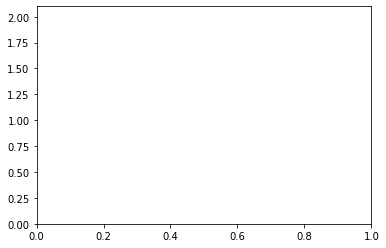

In [ ]:
fig ,ax = plt.subplots()

ax.set_xlim((0,1))
ax.set_ylim((0,2.1))

line, = ax.plot([],[],lw =2)
line2, = ax.plot([],[],lw =2)


# $ \frac{\partial u}{\partial t} + \frac{1}{2} \frac{\partial u^2}{\partial x} = 0$

Condições de contorno:

$ IC: u(x,0) =  \cos(2\pi x) + 1$ 

 $BC: u(0,t) = u(1,t)$


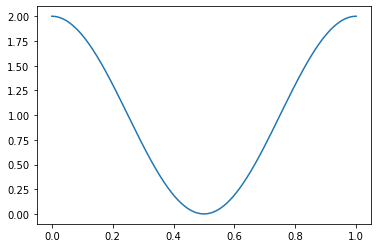

In [ ]:
N = 400
hx = 1.0 / (N+1)
ht = hx / 2.0
x = np.linspace(0,1,N+2)
Un = np.zeros(N+2)
for i in range(0,N+2):
    Un[i] = np.cos(2.0*np.pi*hx*i) + 1.0

plt.plot(x,Un)            

In [ ]:
def init():
  line.set_data([],[])
  return (line,)

In [ ]:
def animate(i):
  global Un
  for n in range(int(0.2/ht)):
      Un1 = Un.copy()
      for i in range(1,N+2):
        Un1[i] = Un[i] - ht/hx/2.0*(Un[i]**2.0-Un[i-1]**2.0)
        
      Un1[0] = Un1[N+1]
  line.set_data(x,Un1)
  Un = Un1.copy()
  return (line,)
     

In [ ]:
anim = animation.FuncAnimation(fig,animate,init_func = init, frames = 180, interval = 20, blit = True)

### Animação 

In [ ]:
HTML(anim.to_html5_video())